# E08-SentimentPrediction
## Santiago Barco - 200913781		
## Rafael Niño - 200522388	

<img src="https://media.vanityfair.com/photos/5a8b5745a7ca9745242bb116/master/w_768,c_limit/how-twitter-lost-the-internet-war.jpg">

Disponible en: https://media.vanityfair.com/photos/5a8b5745a7ca9745242bb116/master/w_768,c_limit/how-twitter-lost-the-internet-war.jpg

# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [300]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [301]:
tweets.shape

(14640, 14)

In [302]:
tweets[['airline_sentiment','text']]

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials t...
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
570300616901320704,positive,"@VirginAmerica yes, nearly every time I fly VX..."
570300248553349120,neutral,@VirginAmerica Really missed a prime opportuni...
570299953286942721,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"


### Proportion of tweets with each sentiment

In [303]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [304]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

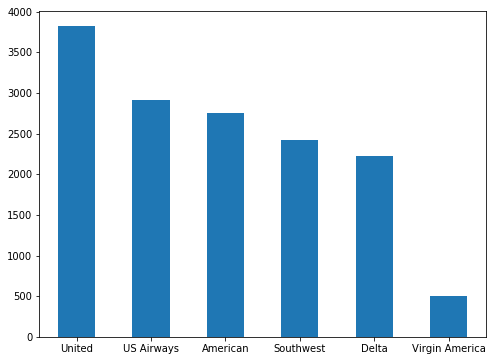

In [305]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

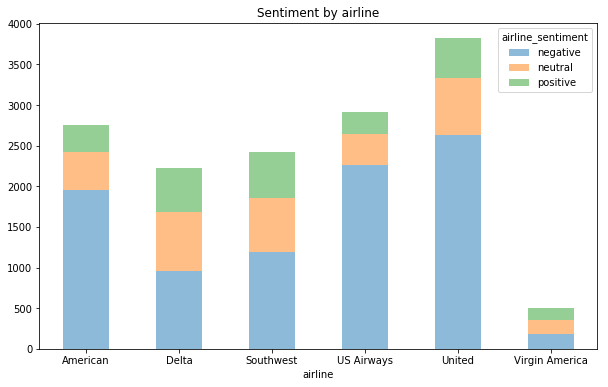

In [306]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [389]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [390]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

# CountVectorizer

In [309]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 17964)

In [310]:
# Default CountVectorizer
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)

# use Naive Bayes to predict the star rating
rf = RandomForestClassifier()
pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.703959
std       0.034489
min       0.624317
25%       0.700359
50%       0.711407
75%       0.715042
max       0.762295
dtype: float64

In [311]:
# Default CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

# use Naive Bayes to predict the star rating
rf = RandomForestClassifier()
pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.713251
std       0.027918
min       0.649590
25%       0.703413
50%       0.717704
75%       0.730157
max       0.752732
dtype: float64

In [312]:
X_dtm.shape

(14640, 15051)

# StopWords

In [313]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    rf = RandomForestClassifier()
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe())

In [314]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  14770
count    10.000000
mean      0.699722
std       0.037779
min       0.629098
25%       0.693122
50%       0.696514
75%       0.711798
max       0.775956
dtype: float64


# n-grams

In [315]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  117630
count    10.000000
mean      0.714545
std       0.026528
min       0.660519
25%       0.703774
50%       0.723114
75%       0.729508
max       0.754781
dtype: float64


# WordNetLemmatizer

In [316]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [317]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [318]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  26089
count    10.000000
mean      0.700953
std       0.019346
min       0.661202
25%       0.692187
50%       0.706967
75%       0.709848
max       0.733607
dtype: float64


# Stemmer

In [319]:
# initialize stemmer
stemmer = SnowballStemmer('english')

In [320]:
vect = CountVectorizer()
vect.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [321]:
words = list(vect.vocabulary_.keys())[:100]

In [322]:
# stem each word
print([stemmer.stem(word) for word in words])

['virginamerica', 'what', 'dhepburn', 'said', 'plus', 'you', 've', 'ad', 'commerci', 'to', 'the', 'experi', 'tacki', 'didn', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip', 'it', 'realli', 'aggress', 'blast', 'obnoxi', 'entertain', 'in', 'your', 'guest', 'face', 'amp', 'they', 'have', 'littl', 'recours', 'and', 'big', 'bad', 'thing', 'about', 'serious', 'would', 'pay', '30', 'flight', 'for', 'seat', 'that', 'this', 'play', 'onli', 'fli', 'va', 'yes', 'near', 'everi', 'time', 'fli', 'vx', 'ear', 'worm', 'won', 'go', 'away', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parodi', 'there', 'https', 'co', 'mwpg7grezp', 'well', 'but', 'now', 'do', 'was', 'amaz', 'arriv', 'an', 'hour', 'earli', 're', 'too', 'good', 'me', 'did', 'know', 'suicid', 'is', 'second', 'lead', 'caus', 'of', 'death', 'among']


In [323]:
# define a function that accepts text and returns a list of lemmas
def split_into_stemm(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

In [324]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_stemm)
tokenize_test(vect)

Features:  24229
count    10.000000
mean      0.703208
std       0.020614
min       0.670082
25%       0.697389
50%       0.701981
75%       0.710239
max       0.744536
dtype: float64


# TfidfVectorizer

In [325]:
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())
tf

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [408]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

### PRIMER MODELO

In [409]:
model = Sequential()

model.add(Dense(128, input_shape=(15051,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))


In [410]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               1926656   
_________________________________________________________________
activation_33 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 387       
_________________________________________________________________
activation_34 (Activation)   (None, 3)                 0         
Total params: 1,927,555
Trainable params: 1,927,299
Non-trainable params: 256
________________________________________________________________

In [411]:
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

In [413]:
y = np_utils.to_categorical(y,3)

## Primer modelo completo Evaluate the performance using the testing set

In [418]:
model.fit(X_dtm,y,epochs=5,verbose=2)

Epoch 1/5
 - 15s - loss: 0.4539 - acc: 0.8286
Epoch 2/5
 - 14s - loss: 0.4088 - acc: 0.8506
Epoch 3/5
 - 14s - loss: 0.3774 - acc: 0.8589
Epoch 4/5
 - 16s - loss: 0.3425 - acc: 0.8740
Epoch 5/5
 - 15s - loss: 0.3225 - acc: 0.8828


In [419]:
# make predictions for testing set
y_pred = model.predict_classes(X_dtm)
y_pred

array([0, 1, 0, ..., 0, 2, 0])

In [420]:
Ynew=y.argmax(axis=1)

In [421]:
print('The accuracy of the nnet model is ',(y_pred==Ynew).mean())

The accuracy of the nnet model is  0.925068306011


# Using Train - Test

## Segundo modelo con Train and Test Evaluate the performance using the testing set

In [400]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, random_state=1)

In [401]:
X_train.shape

(10980, 15051)

In [402]:
X_test.shape

(3660, 15051)

In [403]:
y_train.shape

(10980,)

In [404]:
y_test.shape

(3660,)

In [357]:
# Default CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))

# use Naive Bayes to predict the star rating
rf = RandomForestClassifier()
print(pd.Series(cross_val_score(rf, X_train, y_train, cv=10)).describe())

count    10.000000
mean      0.735243
std       0.008745
min       0.723385
25%       0.729613
50%       0.732816
75%       0.740320
max       0.753412
dtype: float64


In [360]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [361]:
model = Sequential()

model.add(Dense(128, input_shape=(15051,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))


In [362]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               1926656   
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 387       
_________________________________________________________________
activation_32 (Activation)   (None, 3)                 0         
Total params: 1,927,555
Trainable params: 1,927,299
Non-trainable params: 256
________________________________________________________________

In [363]:
y_train = np_utils.to_categorical(y_train,3)

In [364]:
y_train.shape

(10980, 3)

In [365]:
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

## Segundo modelo con Train and Test Evaluate the performance using the testing set

In [366]:
model.fit(X_train,y_train,epochs=2,verbose=2)

Epoch 1/2
 - 13s - loss: 0.7302 - acc: 0.7005
Epoch 2/2
 - 13s - loss: 0.5096 - acc: 0.8058


In [111]:
model.fit(X_train,Y_train,epochs=5,verbose=2)

Epoch 1/5
 - 14s - loss: 0.4453 - acc: 0.8324
Epoch 2/5
 - 14s - loss: 0.3981 - acc: 0.8529
Epoch 3/5
 - 14s - loss: 0.3643 - acc: 0.8644
Epoch 4/5
 - 15s - loss: 0.3417 - acc: 0.8759
Epoch 5/5
 - 15s - loss: 0.3168 - acc: 0.8851


In [367]:
Y_test = np_utils.to_categorical(y_test,3)

In [368]:
Y_test.shape

(3660, 3)

In [395]:
#y_train = y_train.argmax(axis=1)
#y_test = y_test.argmax(axis=1)

In [396]:
X_test_dtm.shape

(3660, 41326)

In [397]:
# make predictions for testing set
y_pred = model.predict_classes(X_test)
y_pred

array([1, 2, 1, ..., 2, 2, 0])

In [407]:
y_pred

array([1, 2, 1, ..., 2, 2, 0])

In [385]:
Y_train

array([0, 1, 0, ..., 0, 2, 0])

In [405]:
y_test.shape

(3660,)

In [406]:
print('The accuracy of the nnet model is ',(y_pred==y_test).mean())

The accuracy of the nnet model is  0.202459016393


### Conclusiones

Al usar los mismos datos para evaluar el modelo, sin train y test el AUC es mayor al 90%, adicionamente que se obverva overfiting, sin embargo al correr el modelo con una muestra de test, se observa que el modelo ahora tiene un AUC cercano al 20%. Es importante tener esto como referente al realizar modelos, y mucho mas al definir modelos donde las variables son el texto, letras o palabras, ya que se requieren tener en cuenta criterios mas definidos para desarrollar un modelo aceptable al AUC que requiera el cliente del proyecto.
